<a href="https://colab.research.google.com/github/hlqiao23/data-engineering-zoomcamp/blob/main/cohorts/2025/workshops/dlt/DE_Zoomcamp_2025_Data_Ingestion_with_dlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data ingestion with dlt**



## **What is data ingestion?**  
Data ingestion is the process of **extracting** data from a source, transporting it to a suitable environment, and preparing it for use. This often includes **normalizing**, **cleaning**, and **adding metadata**.  

---

### **“A wild dataset Magically appears!”**  

In many data science teams, data seems to appear out of nowhere — because an engineer loads it.  

For example, the well-known **NYC Taxi dataset** looks well-structured and ready to use, making it easy to query and analyze. However, not all datasets arrive in such a clean format.

- **Well-structured data** (with an explicit schema) can be used immediately.  
  - Examples: Parquet, Avro, or database tables where data types and structures are predefined.  
- **Unstructured or weakly typed data** (without a defined schema) often needs cleaning and formatting first.  
  - Examples: CSV, JSON, where fields might be inconsistent, nested or missing key details.  

💡 **What is a schema?**  
A schema defines the expected format and structure of data, including field names, data types, and relationships.  

---

### **Be the Magician! 😎**  

Since you're here to learn data engineering, **you** will be the one making datasets magically appear!  

To build effective pipelines, you need to master:  

✅ **Extracting** data from various sources (APIs, databases, files).  
✅ **Normalization** data by transforming, cleaning, and defining schemas.  
✅ **Loading** data where it can be used (data warehouse, lake, or database).


### **Why are data pipelines so amazing?**  

Data pipelines are the backbone of modern data-driven organizations, transforming raw, scattered data into actionable insights.
They ensure data flows seamlessly from its source to its final destination, where it can drive decision-making, analytics, and innovation.
But pipelines don’t just move data — they enable an entire ecosystem of functionality that makes them indispensable.  

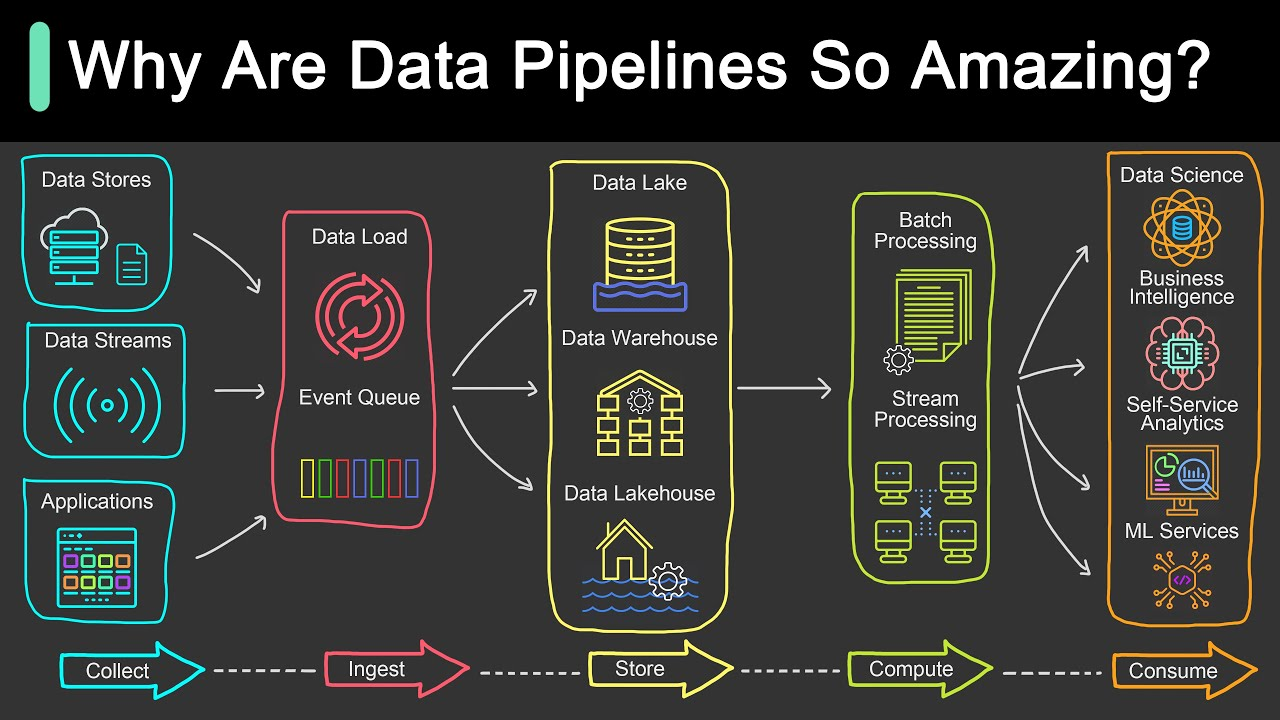



### **What makes data pipelines so essential?**  

1. **Collect**:  
   Data pipelines gather information from a variety of sources, such as databases, data streams, and applications. This ensures no data is overlooked.  
   - Example: Retrieving sales data from an online store or capturing user activity logs from an app.  

2. **Ingest**:  
   The collected data flows into an event queue, where it’s organized and prepared for the next steps.  
   - **Structured data** (like Parquet files or database tables) can be processed immediately.  
   - **Unstructured data** (like CSV or JSON files) often needs cleaning and normalization.  
   - Example: Cleaning a JSON response by standardizing its fields or formatting dates in a CSV file.  

3. **Store**:  
   Pipelines send the processed data to **data lakes**, **data warehouses**, or **data lakehouses** for efficient storage and easy access.  
   - Example: Storing marketing campaign data in a data warehouse to analyze its performance.  

4. **Compute**:  
   Data is processed either in **batches** (large chunks) or as **streams** (real-time updates) to make it ready for analysis.  
   - Example: Calculating monthly revenue or processing live stock market data.  

5. **Consume**:  
   Finally, the prepared data is delivered to users in forms they can act on:  
   - **Dashboards** for executives and analysts.  
   - **Self-service analytics tools** for teams exploring trends.  
   - **Machine learning models** for predictions and automation.  

---

### **Why are data engineers so important in this process?**  

Data engineers are the architects behind these pipelines. They don’t just build pipelines—they make sure they’re reliable, efficient, and scalable. Beyond pipeline development, data engineers:  
- **Optimize data storage** to keep costs low and performance high.  
- **Ensure data quality and integrity**, addressing duplicates, inconsistencies, and missing values.  
- **Implement governance** for secure, compliant, and well-managed data.  
- **Adapt data architectures** to meet the changing needs of the organization.  

Ultimately, their role is to strategically manage the entire **data lifecycle**, from collection to consumption.



---

### **What will you learn in this workshop?**  

In this workshop, you’ll learn the core skills required to build and manage data pipelines:  
- **How to build robust, scalable, and self-maintaining pipelines**.  
- **Best practices**, like built-in data governance, for ensuring clean and reliable data flows.  
- **Incremental loading techniques** to refresh data quickly and cost-effectively.  
- **How to build a Data Lake** with dlt.

By the end, you’ll not only understand why data pipelines are amazing, but you’ll also know how to create them with best practices to power your organization’s data-driven success.🚀



---
# Data ingestion steps (ETL)
✅ **Extracting** data from various sources (APIs, databases, files).  
✅ **Normalization** data by transforming, cleaning, and defining schemas.  
✅ **Loading** data where it can be used (data warehouse, lake, or database).

---
## **Extracting data**

99% of data you're extracting are stored in:
1. SQL databases
2. APIs
3. Files

In this workshop, we'll cover the **API**, which is like a doorway to the data. Here are the most common types:  

- **RESTful APIs**: Provide records of data from business applications.  
  - Example: Getting a list of customers from a CRM system.  
- **File-based APIs**: Return secure file paths to bulk data like JSON or Parquet files stored in buckets.  
  - Example: Downloading monthly sales reports.  
- **Database APIs**: Connect to databases like MongoDB or SQL, often returning data as JSON, the most common interchange format.  

As an engineer, you will need to build pipelines that “just work”.

So here’s what you need to consider on extraction, to prevent the pipelines from breaking, and to keep them running smoothly:  

1. **Hardware limits**: Be mindful of memory (RAM) and storage (disk space). Overloading these can crash your system.  
2. **Network reliability**: Networks can fail! Always account for retries to make your pipelines more robust.  
   - Tip: Use libraries like `dlt` that have built-in retry mechanisms.  
3. **API rate limits**: APIs often restrict the number of requests you can make in a given time.  
   - Tip: Check the API documentation to understand its limits (e.g., [Zendesk](https://developer.zendesk.com/api-reference/introduction/rate-limits/), [Shopify](https://shopify.dev/docs/api/usage/rate-limits)).  

There are even more challenges to consider when working with APIs — such as **pagination and authentication**. Let’s explore how to handle these effectively when working with **REST APIs**.


### **Working with REST APIs**

REST APIs (Representational State Transfer APIs) are one of the most common ways to extract data. They allow you to retrieve structured data using simple HTTP requests (**GET**, POST, PUT, DELETE). However, working with APIs comes with its own challenges.

There is no common way how to design an API, so each of them is unique in a way.

In [ ]:
import requests

result = requests.get("https://api.github.com/orgs/dlt-hub/repos").json()
print(result[:2])

[{'id': 427664318, 'node_id': 'R_kgDOGX2jvg', 'name': 'rasa_semantic_schema', 'full_name': 'dlt-hub/rasa_semantic_schema', 'private': False, 'owner': {'login': 'dlt-hub', 'id': 89419010, 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjg5NDE5MDEw', 'avatar_url': 'https://avatars.githubusercontent.com/u/89419010?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dlt-hub', 'html_url': 'https://github.com/dlt-hub', 'followers_url': 'https://api.github.com/users/dlt-hub/followers', 'following_url': 'https://api.github.com/users/dlt-hub/following{/other_user}', 'gists_url': 'https://api.github.com/users/dlt-hub/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/dlt-hub/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/dlt-hub/subscriptions', 'organizations_url': 'https://api.github.com/users/dlt-hub/orgs', 'repos_url': 'https://api.github.com/users/dlt-hub/repos', 'events_url': 'https://api.github.com/users/dlt-hub/events{/privacy}', 'received_events_url': 

#### **Common Challenges**

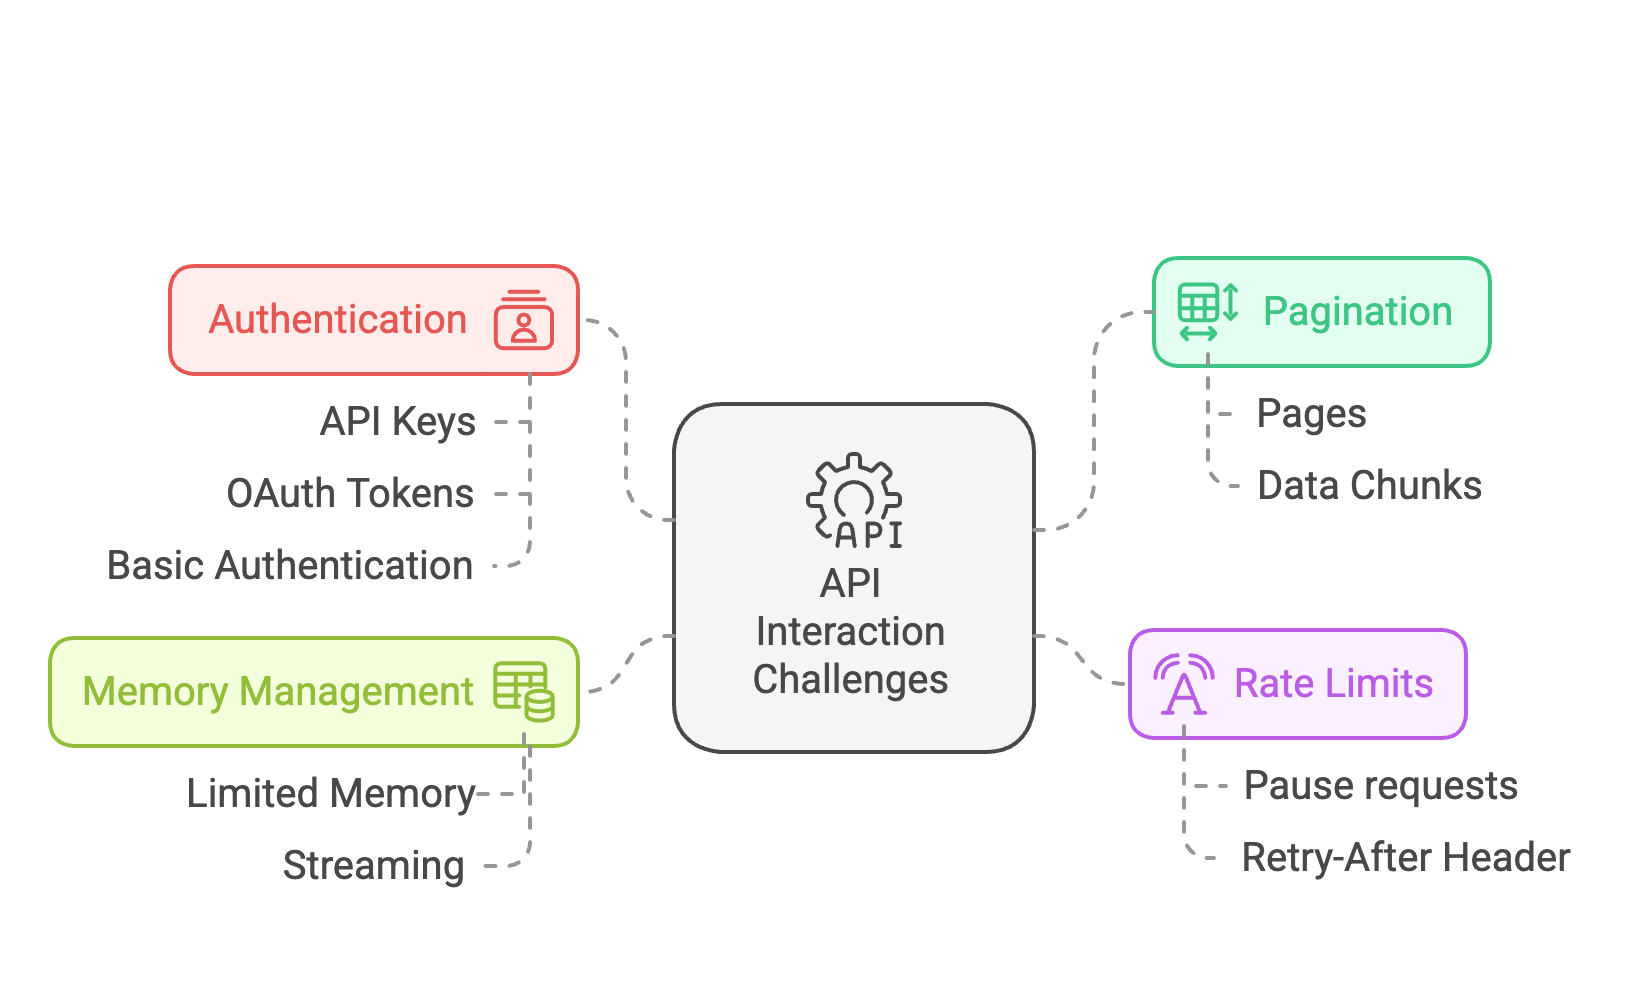

#### **1. Rate limits**  
Many APIs **limit the number of requests** you can make within a certain time frame to prevent overloading their servers. If you exceed this limit, the API may **reject your requests** temporarily or even block you for a period.  

To avoid hitting these limits, we can:  
- **Monitor API rate limits** – Some APIs provide headers that tell you how many requests you have left.  
- **Pause requests when needed** – If we're close to the limit, we wait before making more requests.  
- **Implement automatic retries** – If a request fails due to rate limiting, we can wait and retry after some time.  

💡Some APIs provide a **retry-after** header, which tells you how long to wait before making another request. Always check the API documentation for best practices!


---

#### **2. Authentication**  
Many APIs require an **API key or token** to access data securely. Without authentication, requests may be limited or denied.  

> Example: `"https://api.github.com/user/ssh_signing_keys"`

🔐 **Types of Authentication in APIs:**  
- **API Keys** – A simple token included in the request header or URL.  
- **OAuth Tokens** – A more secure authentication method requiring user authorization.  
- **Basic Authentication** – Using a username and password (less common today).  

💡 Never share your API token publicly! Store it in environment variables or use a secure secrets manager.


----
#### **3. Pagination**

Many APIs return data in **chunks (or pages)** rather than sending everything at once. This prevents **overloading the server** and improves performance, especially for large datasets. To retrieve **all the data**, we need to make multiple requests and keep track of pages until we reach the last one.

📌 Example:

>In this example, we’ll request data from an API that serves the **NYC taxi dataset**.

#### **API documentation**:  
- **Data**: Comes in pages of 1,000 records.  
- **Pagination**: When there’s no more data, the API returns an empty page.  
- **Details**:  
  - **Method**: GET  
  - **URL**: `https://us-central1-dlthub-analytics.cloudfunctions.net/data_engineering_zoomcamp_api`  
  - **Parameters**:  
    - `page`: Integer (page number), defaults to 1.

For these purposes we created an API that can serve the data you are already familiar with. The API returns **1,000 records per page**, and we must request multiple pages to retrieve the full dataset.


In [ ]:
import requests

BASE_API_URL = "https://us-central1-dlthub-analytics.cloudfunctions.net/data_engineering_zoomcamp_api"

page_number = 1
while True:
    params = {'page': page_number}
    response = requests.get(BASE_API_URL, params=params)
    page_data = response.json()

    if not page_data:
        break

    print(page_data)
    page_number += 1

    # limit the number of pages for testing
    if page_number > 2:
      break

[{'End_Lat': 40.742963, 'End_Lon': -73.980072, 'Fare_Amt': 45.0, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.641525, 'Start_Lon': -73.787442, 'Tip_Amt': 9.0, 'Tolls_Amt': 4.15, 'Total_Amt': 58.15, 'Trip_Distance': 17.52, 'Trip_Dropoff_DateTime': '2009-06-14 23:48:00', 'Trip_Pickup_DateTime': '2009-06-14 23:23:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 0.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.740187, 'End_Lon': -74.005698, 'Fare_Amt': 6.5, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.722065, 'Start_Lon': -74.009767, 'Tip_Amt': 1.0, 'Tolls_Amt': 0.0, 'Total_Amt': 8.5, 'Trip_Distance': 1.56, 'Trip_Dropoff_DateTime': '2009-06-18 17:43:00', 'Trip_Pickup_DateTime': '2009-06-18 17:35:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 1.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.718043, 'End_Lon': -74.004745, 'Fare_Amt': 12.5, 'Passenger_Count': 5, 'Payment_Type': 'Credit', 'Rate_Code': N

What happens here:
- Starts at page 1 and makes a GET request to the API.
- Retrieves JSON data and checks if the page contains records.
- If data exists, prints it and moves to the next page.
- If the page is empty, stops requesting more data.


💡 Different APIs handle pagination differently (some use offsets, cursors, or tokens instead of page numbers). Always check the API documentation for the correct method!

---

#### **4. Avoiding memory issues during extraction**  

To prevent your pipeline from crashing, you need to control memory usage.  

#### **Challenges with memory**  
- Many pipelines run on systems with limited memory, like serverless functions or shared clusters.  
- If you try to load all the data into memory at once, it can crash the entire system.  
- Even disk space can become an issue if you’re storing large amounts of data.  


#### **The solution: batch processing / streaming data**  

**Streaming** means processing data in small chunks or events, rather than loading everything at once. This keeps memory usage low and ensures your pipeline remains efficient.

As a data engineer, you’ll use streaming to transfer data between buffers, such as:  
- from APIs to local files;  
- from Webhooks to event queues;  
- from Event queues (like Kafka) to storage buckets.


---

### **Example of extracting data: Grabbing data from an API**

In this example, we’ll request data from an API that serves the **NYC taxi dataset**. For these purposes we created an API that can serve the data you are already familiar with.

#### **API documentation**:  
- **Data**: Comes in pages of 1,000 records.  
- **Pagination**: When there’s no more data, the API returns an empty page.  
- **Details**:  
  - **Method**: GET  
  - **URL**: `https://us-central1-dlthub-analytics.cloudfunctions.net/data_engineering_zoomcamp_api`  
  - **Parameters**:  
    - `page`: Integer (page number), defaults to 1.  

Here’s how we design our requester:  
1. **Request page by page** until we hit an empty page. Since we don’t know how much data is behind the API, we must assume it could be as little as 1,000 records or as much as 10GB.
2. **Use a generator** to handle this efficiently and avoid loading all data into memory.  



In [ ]:
import requests

BASE_API_URL = "https://us-central1-dlthub-analytics.cloudfunctions.net/data_engineering_zoomcamp_api"

def paginated_getter():
    page_number = 1
    while True:
        params = {'page': page_number}
        try:
            response = requests.get(BASE_API_URL, params=params)
            response.raise_for_status()
            page_json = response.json()
            print(f'Got page {page_number} with {len(page_json)} records')

            if page_json:
                yield page_json
                page_number += 1
            else:
                break
        except Exception as e:
            print(e)
            break


for page_data in paginated_getter():
    print(page_data)
    break

Got page 1 with 1000 records
[{'End_Lat': 40.742963, 'End_Lon': -73.980072, 'Fare_Amt': 45.0, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.641525, 'Start_Lon': -73.787442, 'Tip_Amt': 9.0, 'Tolls_Amt': 4.15, 'Total_Amt': 58.15, 'Trip_Distance': 17.52, 'Trip_Dropoff_DateTime': '2009-06-14 23:48:00', 'Trip_Pickup_DateTime': '2009-06-14 23:23:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 0.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.740187, 'End_Lon': -74.005698, 'Fare_Amt': 6.5, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.722065, 'Start_Lon': -74.009767, 'Tip_Amt': 1.0, 'Tolls_Amt': 0.0, 'Total_Amt': 8.5, 'Trip_Distance': 1.56, 'Trip_Dropoff_DateTime': '2009-06-18 17:43:00', 'Trip_Pickup_DateTime': '2009-06-18 17:35:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 1.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.718043, 'End_Lon': -74.004745, 'Fare_Amt': 12.5, 'Passenger_Count': 5, 'Payment_Ty

In this approach to grabbing data from APIs, there are both pros and cons:  

✅ Pros: **Easy memory management** since the API returns data in small pages or events.  
❌ Cons: **Low throughput** because data transfer is limited by API constraints (rate limits, response time).


To simplify data extraction, use specialized tools that follow best practices like streaming — for example, [dlt (data load tool)](https://dlthub.com). It efficiently processes data while **keeping memory usage low** and **leveraging parallelism** for better performance.


### **Extracting data with dlt**

Extracting data from APIs manually requires handling
- **pagination**,
- **rate limits**,
- **authentication**,
- **errors**.

Instead of writing custom scripts, **[dlt](https://dlthub.com/)** simplifies the process with a built-in **[REST API Client](https://dlthub.com/docs/general-usage/http/rest-client)**, making extraction **efficient, scalable, and reliable**.  

---

### **Why use dlt for extraction?**  

✅ **Built-in REST API support** – Extract data from APIs with minimal code.  
✅ **Automatic pagination handling** – No need to loop through pages manually.  
✅ **Manages Rate Limits & Retries** – Prevents exceeding API limits and handles failures.  
✅ **Streaming support** – Extracts and processes data without loading everything into memory.  
✅ **Seamless integration** – Works with **normalization and loading** in a single pipeline.  


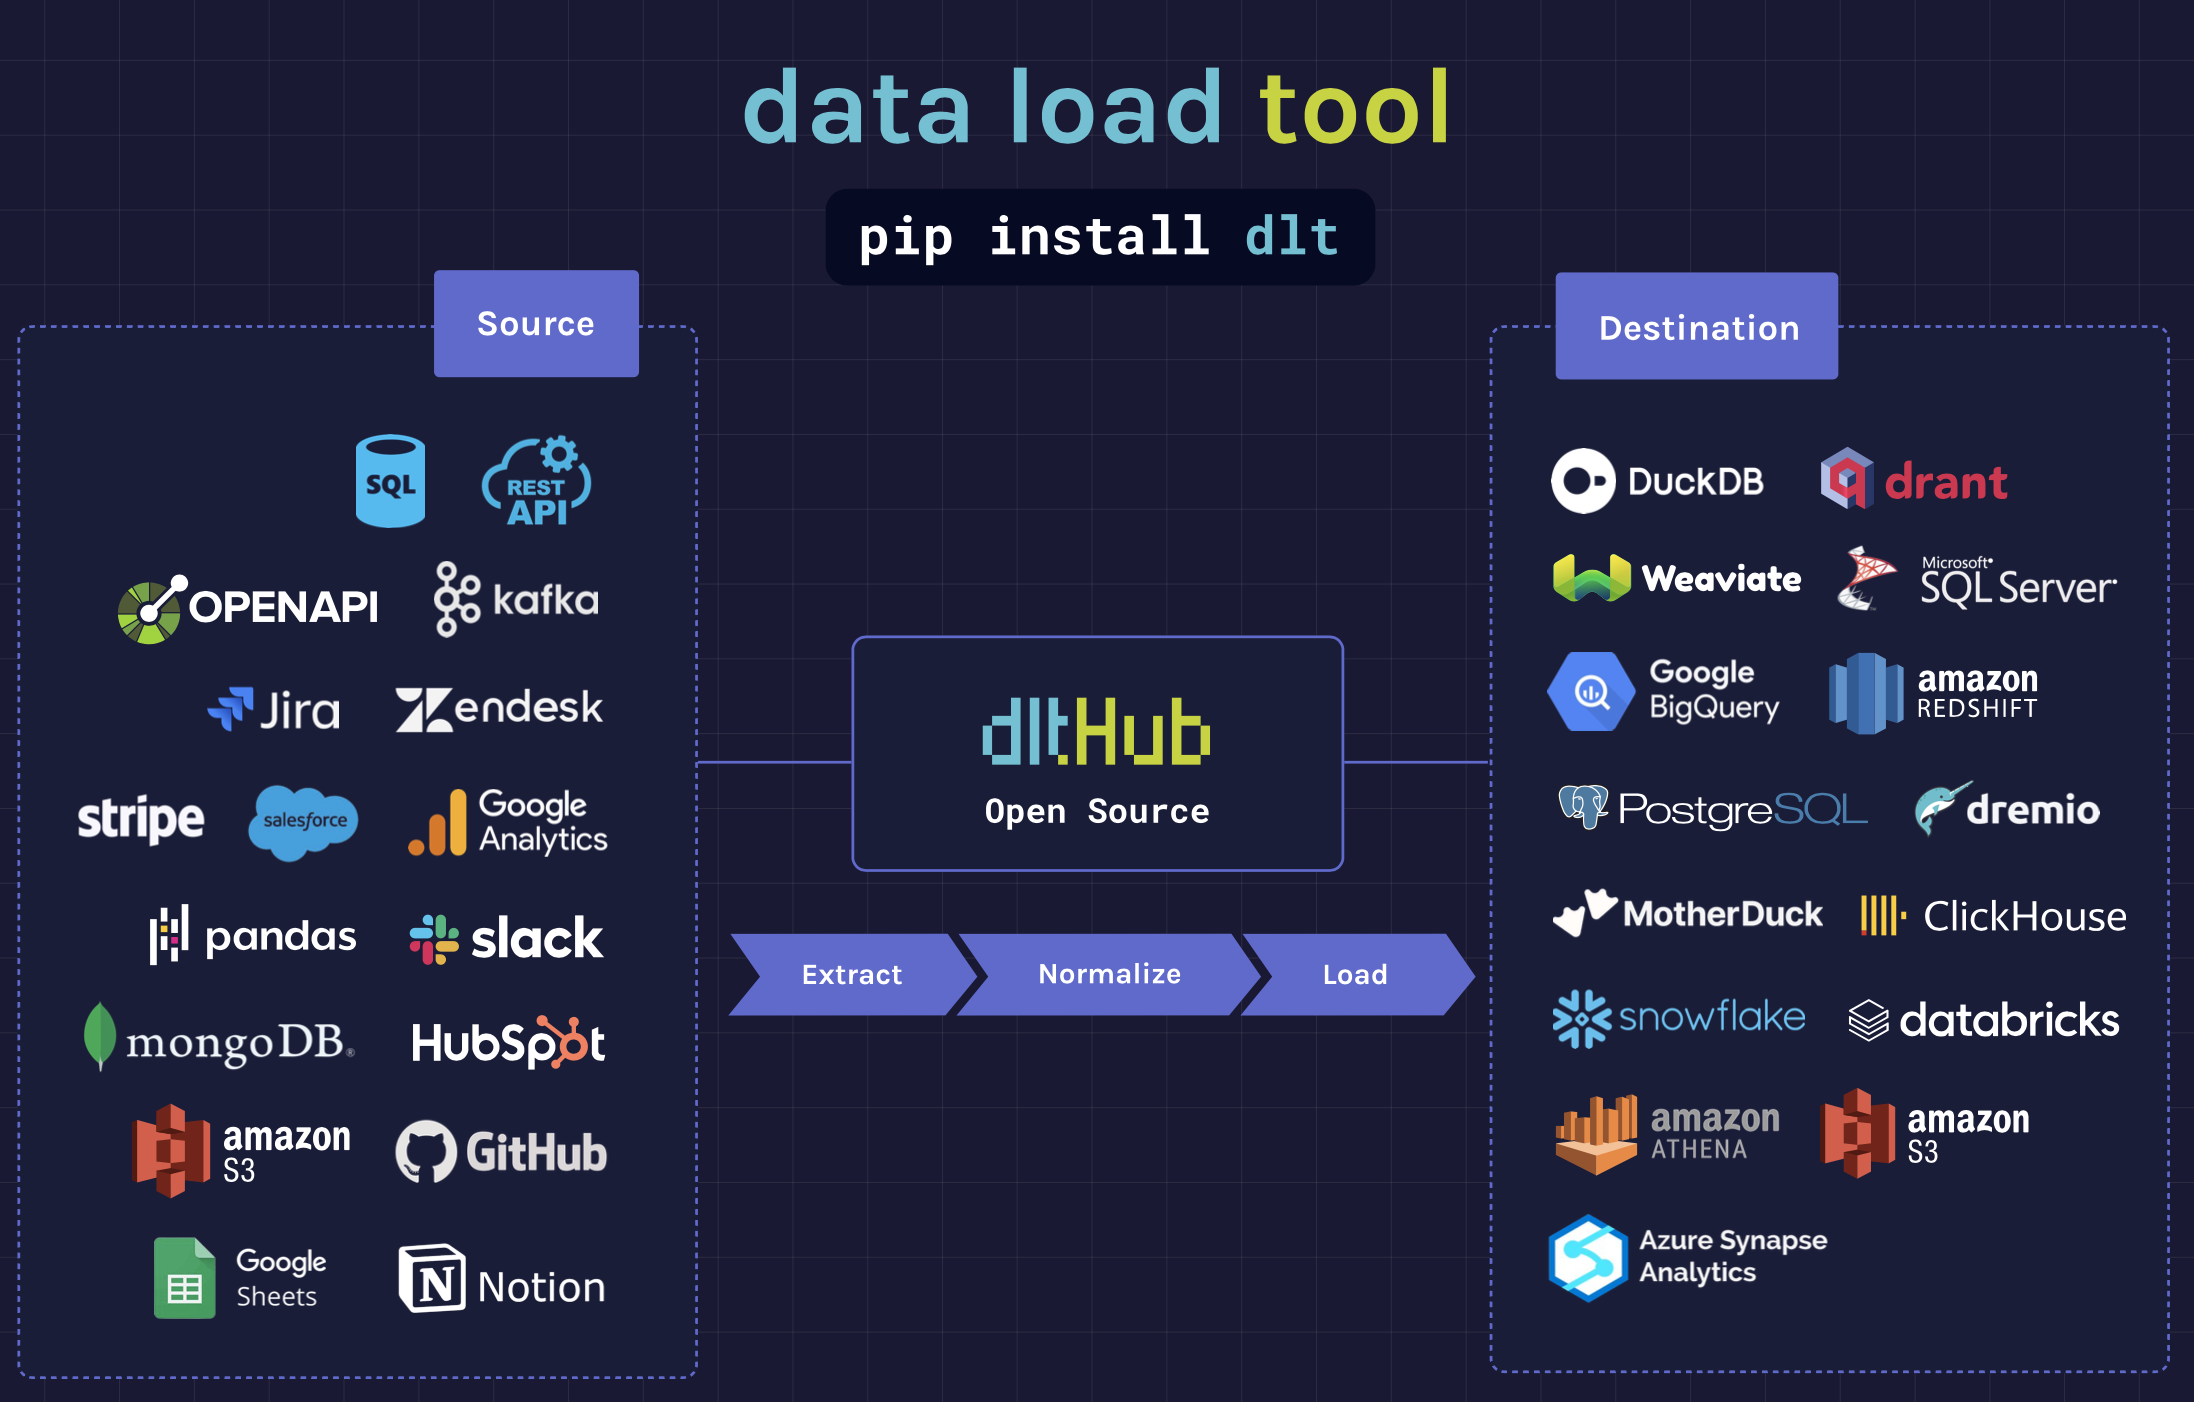

### **Install dlt**
[Install](https://dlthub.com/docs/reference/installation) dlt with DuckDB as destination:

duckDB is a lightweight DB and easy to spin up

In [1]:
%%capture
!pip install dlt[duckdb]


### **Example of extracting data with dlt**  

Instead of manually writing pagination logic, let’s use **dlt’s [`RESTClient` helper](https://dlthub.com/docs/general-usage/http/rest-client)** to extract NYC taxi ride data:  

In [2]:
import dlt
from dlt.sources.helpers.rest_client import RESTClient
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator


def paginated_getter():
    client = RESTClient(
        base_url="https://us-central1-dlthub-analytics.cloudfunctions.net",
        # Define pagination strategy - page-based pagination
        paginator=PageNumberPaginator(   # <--- Pages are numbered (1, 2, 3, ...)
            base_page=1,   # <--- Start from page 1
            total_path=None    # <--- No total count of pages provided by API, pagination should stop when a page contains no result items
        )
    )

    for page in client.paginate("data_engineering_zoomcamp_api"):    # <--- API endpoint for retrieving taxi ride data
        yield page   # remember about memory management and yield data


for page_data in paginated_getter():
    print(page_data)
    break

[{'End_Lat': 40.742963, 'End_Lon': -73.980072, 'Fare_Amt': 45.0, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.641525, 'Start_Lon': -73.787442, 'Tip_Amt': 9.0, 'Tolls_Amt': 4.15, 'Total_Amt': 58.15, 'Trip_Distance': 17.52, 'Trip_Dropoff_DateTime': '2009-06-14 23:48:00', 'Trip_Pickup_DateTime': '2009-06-14 23:23:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 0.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.740187, 'End_Lon': -74.005698, 'Fare_Amt': 6.5, 'Passenger_Count': 1, 'Payment_Type': 'Credit', 'Rate_Code': None, 'Start_Lat': 40.722065, 'Start_Lon': -74.009767, 'Tip_Amt': 1.0, 'Tolls_Amt': 0.0, 'Total_Amt': 8.5, 'Trip_Distance': 1.56, 'Trip_Dropoff_DateTime': '2009-06-18 17:43:00', 'Trip_Pickup_DateTime': '2009-06-18 17:35:00', 'mta_tax': None, 'store_and_forward': None, 'surcharge': 1.0, 'vendor_name': 'VTS'}, {'End_Lat': 40.718043, 'End_Lon': -74.004745, 'Fare_Amt': 12.5, 'Passenger_Count': 5, 'Payment_Type': 'Credit', 'Rate_Code': N



**How dlt simplifies API extraction:**  

🔹 **No manual pagination** – dlt **automatically** fetches **all pages** of data.  
🔹 **Low memory usage** – Streams data **chunk by chunk**, avoiding RAM overflows.  
🔹 **Handles rate limits & retries** – Ensures requests are sent efficiently **without failures**.  
🔹 **Flexible destination support** – Load extracted data into **databases, warehouses, or data lakes**.  


---

Well, you’ve successfully **extracted** the data — great! 🎉 But raw data isn’t always ready to use. Now, you need to **process**, **clean**, and **structure** it before it can be loaded into a data lake or data warehouse.


## **Normalizing data**  

You often hear that data professionals spend most of their time **“cleaning” data** — but what does that actually mean?  

Data cleaning typically involves two key steps:  

1. **Normalizing data** – Structuring and standardizing data **without changing its meaning**.  
2. **Filtering data for a specific use case** – Selecting or modifying data **in a way that changes its meaning** to fit the analysis.






### **Data cleaning: more than just fixing errors**  

A big part of **data cleaning** is actually **metadata work** — ensuring data is structured and standardized so it can be used effectively.  

#### **Metadata tasks in data cleaning:**  

✅ **Add types** – Convert strings to numbers, timestamps, etc.  
✅ **Rename columns** – Ensure names follow a standard format (e.g., no special characters).  
✅ **Flatten nested dictionaries** – Bring values from nested dictionaries into the top-level row.  
✅ **Unnest lists/arrays** – Convert lists into **child tables** since they can’t be stored directly in a flat format.  

👉 **We’ll look at a practical example next, as these concepts are easier to understand with real data.**  

---

### **Why prepare data? Why not use JSON directly?**  

While JSON is a great format for **data transfer**, it’s not ideal for analysis. Here’s why:  

❌ **No enforced schema** – We don’t always know what fields exist in a JSON document.  
❌ **Inconsistent data types** – A field like `age` might appear as `25`, `"twenty five"`, or `25.00`, which can break downstream applications.  
❌ **Hard to process** – If we need to group data by day, we must manually convert date strings to timestamps.  
❌ **Memory-heavy** – JSON requires reading the entire file into memory, unlike databases or columnar formats that allow scanning just the necessary fields.  
❌ **Slow for aggregation and search** – JSON is not optimized for quick lookups or aggregations like columnar formats (e.g., Parquet).  


JSON is great for **data exchange** but **not for direct analytical use**. To make data useful, we need to **normalize it** — flattening, typing, and structuring it for efficiency.


---

### **Normalization Example**  

To understand what we’re working with, let’s look at a sample record from our API:

In [3]:
item = page_data[0]
item

{'End_Lat': 40.742963,
 'End_Lon': -73.980072,
 'Fare_Amt': 45.0,
 'Passenger_Count': 1,
 'Payment_Type': 'Credit',
 'Rate_Code': None,
 'Start_Lat': 40.641525,
 'Start_Lon': -73.787442,
 'Tip_Amt': 9.0,
 'Tolls_Amt': 4.15,
 'Total_Amt': 58.15,
 'Trip_Distance': 17.52,
 'Trip_Dropoff_DateTime': '2009-06-14 23:48:00',
 'Trip_Pickup_DateTime': '2009-06-14 23:23:00',
 'mta_tax': None,
 'store_and_forward': None,
 'surcharge': 0.0,
 'vendor_name': 'VTS'}

The data we retrieved from the API has **already been processed and unnested**, meaning that any **nested structures** (like dictionaries and lists) have been flattened, making it easier to store and query in a database or a dataframe. However, let’s imagine we originally received the **raw data** in a more complex format.  


---

### **How was this data processed?**  

Before reaching this format, the raw data likely contained **nested structures** that had to be **flattened and transformed**.  

1️⃣ **Flattened nested coordinates:**  
   - Originally, the latitude and longitude values might have been nested like this:  
     ```json
     "coordinates": {
         "start": {"lat": 40.641525, "lon": -73.787442},
         "end": {"lat": 40.742963, "lon": -73.980072}
     }
     ```
   - These were **flattened** into `Start_Lat`, `Start_Lon`, `End_Lat`, and `End_Lon`.  

2️⃣ **Converted timestamps:**  
   - Originally, timestamps might have been stored as Unix timestamps or separate date/time fields:  
     ```json
     "Trip_Pickup": {"date": "2009-06-14", "time": "23:23:00"}
     ```
   - Now, they are **formatted as ISO datetime strings**:  
     ```json
     "Trip_Pickup_DateTime": "2009-06-14 23:23:00"
     ```

3️⃣ **Unnested passenger & payment information:**  
   - The original structure might have included a nested list for passengers:  
     ```json
     "passengers": [
         {"name": "John", "rating": 4.9},
         {"name": "Jack", "rating": 3.9}
     ]
     ```
   - Since lists **cannot be stored directly in a database table**, they were likely **moved to a separate table**.  







💡 **However, real-world data is rarely this clean!** We often receive raw, nested, and inconsistent data. This is why the **normalization process** is so important—it **prepares** the data for efficient storage and analysis.  **[dlt (data load tool)](https://dlthub.com/docs/intro)** simplifies the **normalization process**, automatically transforming raw data into a **structured, clean format** that is ready for storage and analysis.  


### **Normalizing data with dlt**  

**Why Use dlt for normalization?**  

✅ **Automatically detects schema** – No need to define column types manually.  
✅ **Flattens nested JSON** – Converts complex structures into table-ready formats.  
✅ **Handles data type conversion** – Converts dates, numbers, and booleans correctly.  
✅ **Splits lists into child tables** – Ensures relational integrity for better analysis.  
✅ **Schema evolution support** – Adapts to changes in data structure over time.  

---

### **Example**  

Let's assume we extracted the following raw NYC taxi ride data, which contains **nested dictionaries** and **lists**:  


In [4]:
data = [
    {
        "vendor_name": "VTS",
        "record_hash": "b00361a396177a9cb410ff61f20015ad",
        "time": {
            "pickup": "2009-06-14 23:23:00",
            "dropoff": "2009-06-14 23:48:00"
        },
        "coordinates": {
            "start": {"lon": -73.787442, "lat": 40.641525},
            "end": {"lon": -73.980072, "lat": 40.742963}
        },
        "passengers": [
            {"name": "John", "rating": 4.9},
            {"name": "Jack", "rating": 3.9}
        ]
    }
]

### **How dlt normalizes this data automatically**  

Instead of manually flattening fields and extracting nested lists, we can **load it directly into dlt**:

In [5]:
import dlt

# Define a dlt pipeline with automatic normalization
pipeline = dlt.pipeline(
    pipeline_name="ny_taxi_data",
    destination="duckdb",
    dataset_name="taxi_rides",
)

# Run the pipeline with raw nested data
info = pipeline.run(data, table_name="rides", write_disposition="replace")

# Print the load summary
print(info)

Pipeline ny_taxi_data load step completed in 0.30 seconds
1 load package(s) were loaded to destination duckdb and into dataset taxi_rides
The duckdb destination used duckdb:////content/ny_taxi_data.duckdb location to store data
Load package 1739291643.6572208 is LOADED and contains no failed jobs


In [6]:
print(pipeline.last_trace)

Run started at 2025-02-11 16:34:03.476511+00:00 and COMPLETED in 1.60 seconds with 4 steps.
Step extract COMPLETED in 0.06 seconds.

Load package 1739291643.6572208 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs

Step normalize COMPLETED in 0.10 seconds.
Normalized data for the following tables:
- rides: 1 row(s)
- rides__passengers: 2 row(s)
- _dlt_pipeline_state: 1 row(s)

Load package 1739291643.6572208 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs

Step load COMPLETED in 1.27 seconds.
Pipeline ny_taxi_data load step completed in 0.30 seconds
1 load package(s) were loaded to destination duckdb and into dataset taxi_rides
The duckdb destination used duckdb:////content/ny_taxi_data.duckdb location to store data
Load package 1739291643.6572208 is LOADED and contains no failed jobs

Step run COMPLETED in 1.60 seconds.
Pipeline ny_taxi_data load step completed in 0.30 seconds
1 load package(s) were loaded to destination du

---

### **What happens behind the scenes?**  

After running this pipeline, dlt automatically **transforms the data** into the following **normalized structure**:  

**Main table: `rides`**  

In [7]:
pipeline.dataset(dataset_type="default").rides.df()

,vendor_name,record_hash,time__pickup,time__dropoff,coordinates__start__lon,coordinates__start__lat,coordinates__end__lon,coordinates__end__lat,_dlt_load_id,_dlt_id
0,VTS,b00361a396177a9cb410ff61f20015ad,2009-06-14 23:23:00+00:00,2009-06-14 23:48:00+00:00,-73.787442,40.641525,-73.980072,40.742963,1739291643.6572208,R4t1/hgWRlJZlw


**Child Table: `rides_passengers`**  

In [8]:
pipeline.dataset(dataset_type="default").rides__passengers.df()

,name,rating,_dlt_parent_id,_dlt_list_idx,_dlt_id
0,John,4.9,R4t1/hgWRlJZlw,0,YswKEtL27uF8jA
1,Jack,3.9,R4t1/hgWRlJZlw,1,Y46q8H/RSehoHA




✅ **Nested structures were flattened** into separate columns.  
✅ **Lists were extracted into child tables**, preserving relationships.  
✅ **Timestamps were converted to the correct format.**  

---

### **Why dlt makes normalization easy**  

🔹  **No manual transformations needed** – Just load the raw data, and dlt does the rest!  
🔹 **Database-ready format** – Ensures clean, structured tables for easy querying.  
🔹 **Handles schema evolution** – Adapts to new fields automatically.  
🔹 **Scales effortlessly** – Works for small datasets and enterprise-scale pipelines.  

💡 With dlt, normalization happens automatically, so you can focus on insights instead of data wrangling.


## **Loading data**  

Now that we’ve covered **extracting** and **normalizing** data, the final step is **loading** the data **into a destination**. This is where the processed data is stored, making it ready for querying, analysis, or further transformations.  





---

### **How data loading happens without dlt**  

Before dlt, data engineers had to manually handle **schema validation, batch processing, error handling, and retries** for every destination. This process becomes especially complex when loading data into **data warehouses and data lakes**, where performance optimization, partitioning, and incremental updates are critical.  

### **Example: Loading data into database without dlt**  
A basic pipeline requires:  
1. Setting up a database connection.  
2. Creating tables and defining schemas.  
3. Handling schema changes manually.  
4. Writing queries to insert/update data.  

In [9]:
import duckdb

# 1. Create a connection to an in-memory DuckDB database
conn = duckdb.connect("ny_taxi_manual.db")

# 2. Create the rides Table
# Since our dataset has nested structures, we must manually flatten it before inserting data.
conn.execute("""
CREATE TABLE IF NOT EXISTS rides (
    record_hash TEXT PRIMARY KEY,
    vendor_name TEXT,
    pickup_time TIMESTAMP,
    dropoff_time TIMESTAMP,
    start_lon DOUBLE,
    start_lat DOUBLE,
    end_lon DOUBLE,
    end_lat DOUBLE
);
""")

# 3. Insert Data Manually
# Since JSON data has nested fields, we need to extract and transform them before inserting them into DuckDB.
data = [
    {
        "vendor_name": "VTS",
        "record_hash": "b00361a396177a9cb410ff61f20015ad",
        "time": {
            "pickup": "2009-06-14 23:23:00",
            "dropoff": "2009-06-14 23:48:00"
        },
        "coordinates": {
            "start": {"lon": -73.787442, "lat": 40.641525},
            "end": {"lon": -73.980072, "lat": 40.742963}
        }
    }
]

# Prepare data for insertion
flattened_data = [
    (
        ride["record_hash"],
        ride["vendor_name"],
        ride["time"]["pickup"],
        ride["time"]["dropoff"],
        ride["coordinates"]["start"]["lon"],
        ride["coordinates"]["start"]["lat"],
        ride["coordinates"]["end"]["lon"],
        ride["coordinates"]["end"]["lat"]
    )
    for ride in data
]

# Insert into DuckDB
conn.executemany("""
INSERT INTO rides (record_hash, vendor_name, pickup_time, dropoff_time, start_lon, start_lat, end_lon, end_lat)
VALUES (?, ?, ?, ?, ?, ?, ?, ?)
""", flattened_data)

print("Data successfully loaded into DuckDB!")


# 4. Query Data in DuckDB
# Now that the data is loaded, we can query it using DuckDB’s SQL engine.
df = conn.execute("SELECT * FROM rides").df()

conn.close()
df

Data successfully loaded into DuckDB!


,record_hash,vendor_name,pickup_time,dropoff_time,start_lon,start_lat,end_lon,end_lat
0,b00361a396177a9cb410ff61f20015ad,VTS,2009-06-14 23:23:00,2009-06-14 23:48:00,-73.787442,40.641525,-73.980072,40.742963


Problems without dlt:

❌ **Schema management is manual** – If the schema changes, you need to update table structures manually.  
❌ **No automatic retries** – If the network fails, data may be lost.  
❌ **No incremental loading** – Every run reloads everything, making it slow and expensive.  
❌ **More code to maintain** – A simple pipeline quickly becomes complex.  


---

### **How dlt handles the load step automatically**  

With dlt, loading data **requires just a few lines of code** — schema inference, error handling, and incremental updates are all handled automatically!  


### **Why use dlt for loading?**  

✅ **Supports multiple destinations** – Load data into **BigQuery, Redshift, Snowflake, Postgres, DuckDB, Parquet (S3, GCS)** and more.  
✅ **Optimized for performance** – Uses **batch loading, parallelism, and streaming** for fast and scalable data transfer.  
✅ **Schema-aware** – Ensures that **column names, data types, and structures match** the destination’s requirements.  
✅ **Incremental loading** – Avoids unnecessary reloading by **only inserting new or updated records**.  
✅ **Resilience & retries** – Automatically handles failures, ensuring data is loaded **without missing records**.  


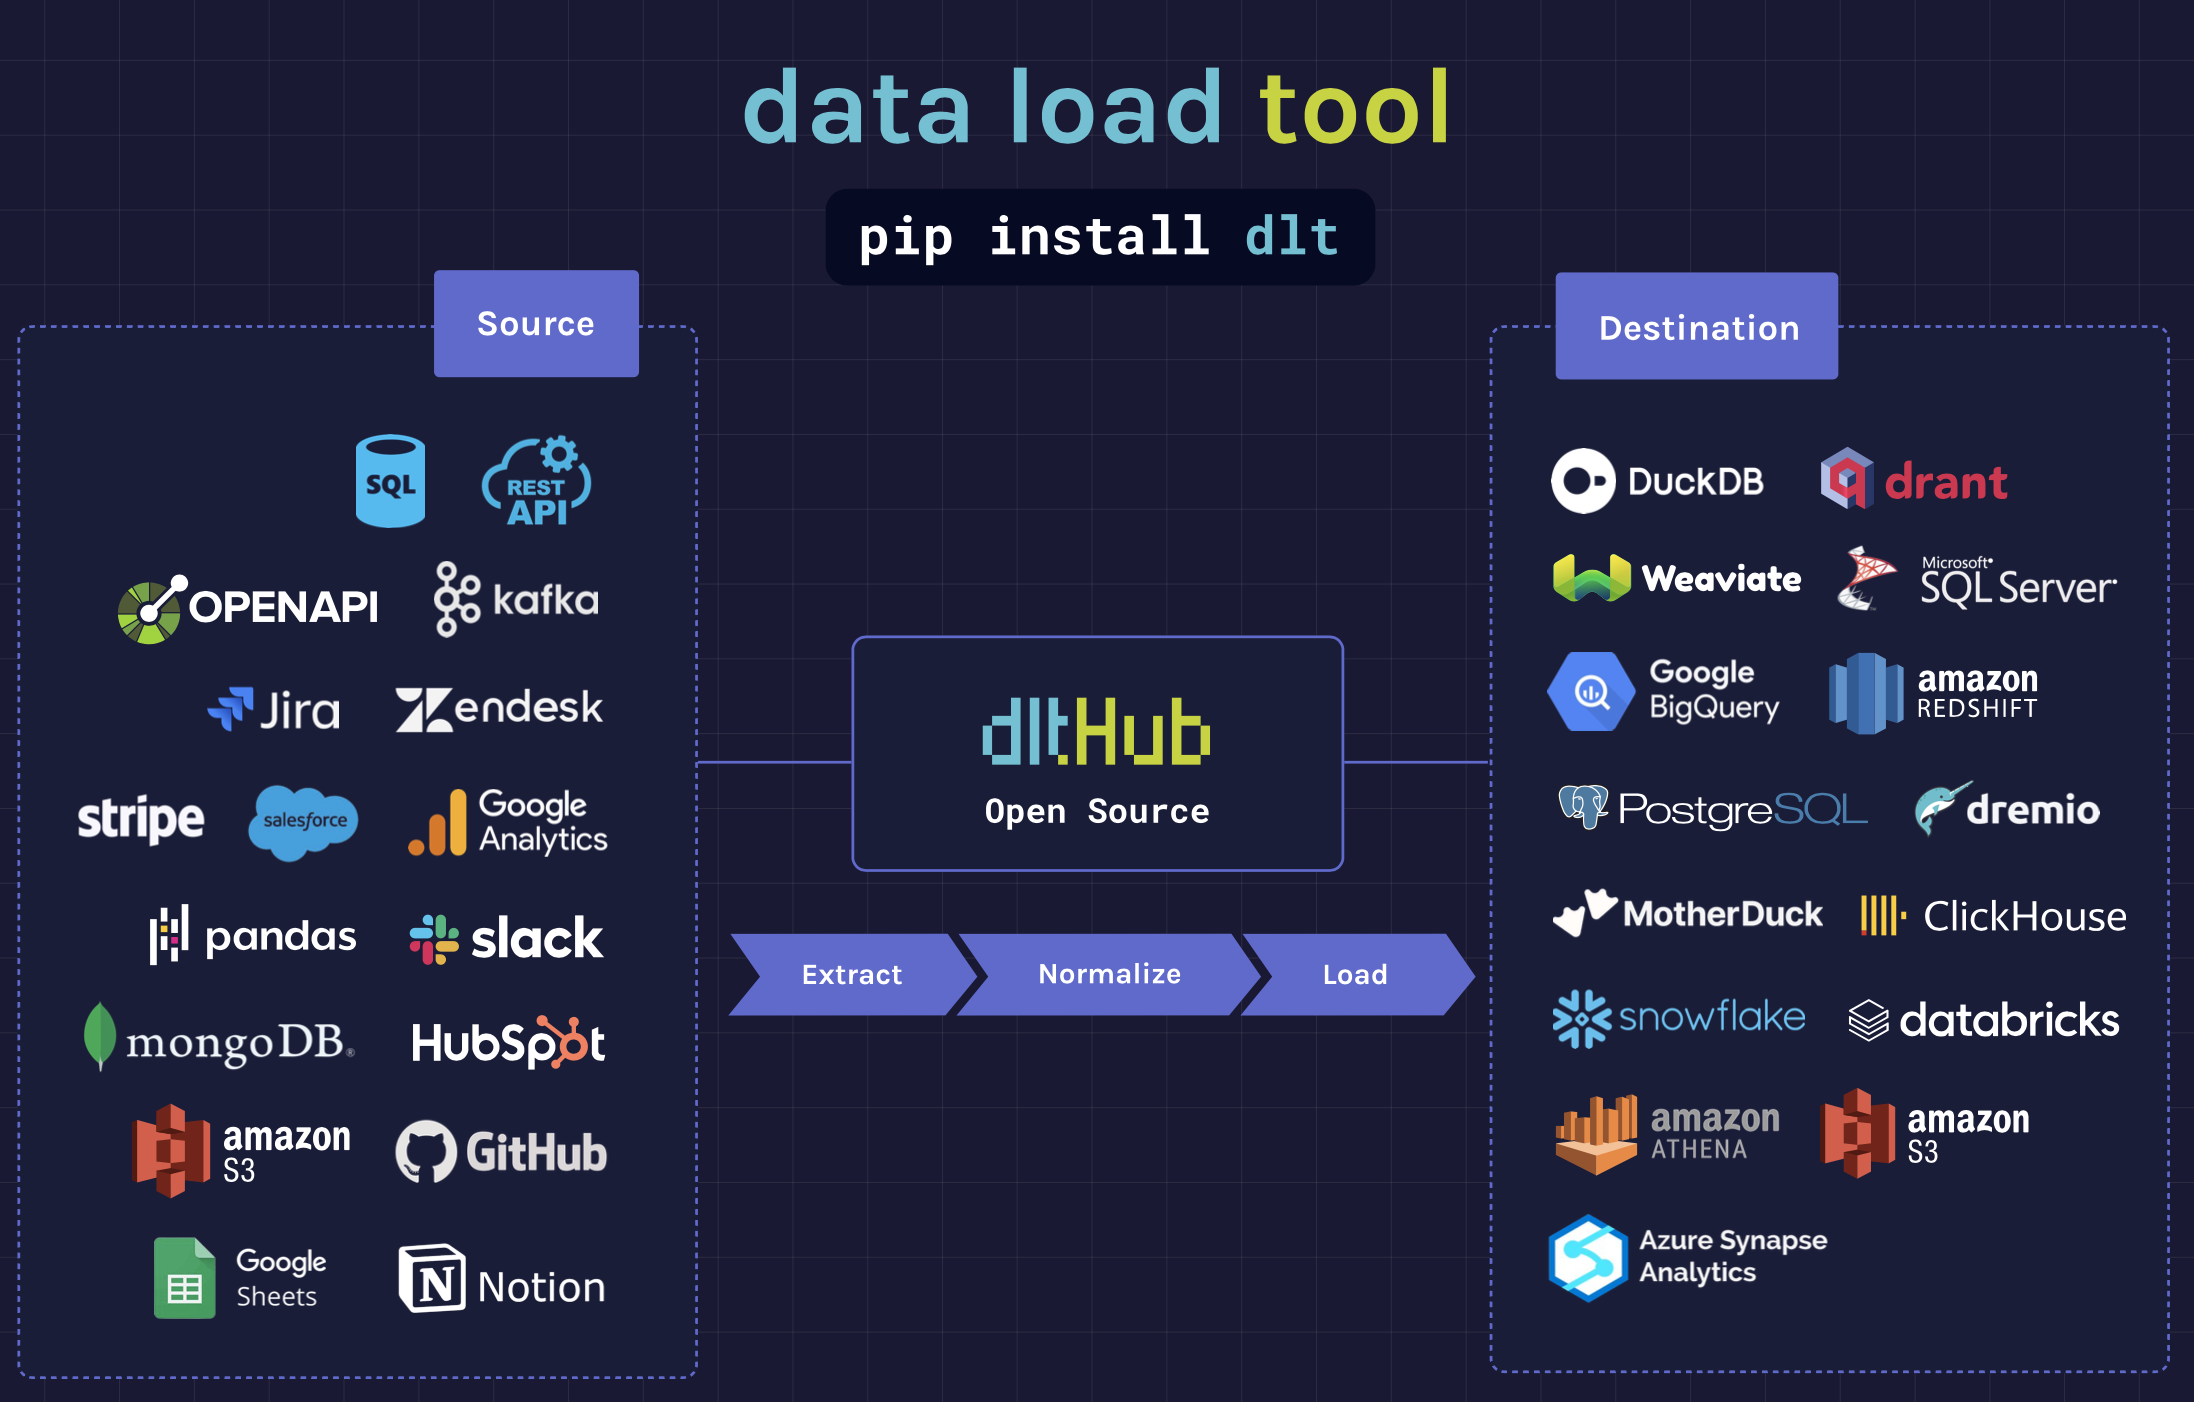

### **Example : Loading data into database with dlt**  



To use all the power of dlt is better to wrap our API Client in the `@dlt.resource` decorator which denotes a logical grouping of data within a data source, typically holding data of similar structure and origin:

In [2]:
%%capture
!pip install dlt

In [3]:
import dlt
from dlt.sources.helpers.rest_client import RESTClient
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator


# Define the API resource for NYC taxi data
@dlt.resource(name="rides")   # <--- The name of the resource (will be used as the table name)
def ny_taxi():
    client = RESTClient(
        base_url="https://us-central1-dlthub-analytics.cloudfunctions.net",
        paginator=PageNumberPaginator(
            base_page=1,
            total_path=None
        )
    )

    for page in client.paginate("data_engineering_zoomcamp_api"):    # <--- API endpoint for retrieving taxi ride data
        yield page   # <--- yield data to manage memory


# define new dlt pipeline
pipeline = dlt.pipeline(destination="duckdb")


# run the pipeline with the new resource
load_info = pipeline.run(ny_taxi, write_disposition="replace")
print(load_info)


# explore loaded data
pipeline.dataset(dataset_type="default").rides.df()

Pipeline dlt_colab_kernel_launcher load step completed in 3.19 seconds
1 load package(s) were loaded to destination duckdb and into dataset dlt_colab_kernel_launcher_dataset
The duckdb destination used duckdb:////content/dlt_colab_kernel_launcher.duckdb location to store data
Load package 1739292588.8543808 is LOADED and contains no failed jobs


,end_lat,end_lon,fare_amt,passenger_count,payment_type,start_lat,start_lon,tip_amt,tolls_amt,total_amt,trip_distance,trip_dropoff_date_time,trip_pickup_date_time,surcharge,vendor_name,_dlt_load_id,_dlt_id,store_and_forward
0,40.742963,-73.980072,45.0,1,Credit,40.641525,-73.787442,9.0,4.15,58.15,17.52,2009-06-14 23:48:00+00:00,2009-06-14 23:23:00+00:00,0.0,VTS,1739292588.8543808,TykN9HkHbq3gpg,NaN
1,40.740187,-74.005698,6.5,1,Credit,40.722065,-74.009767,1.0,0.00,8.50,1.56,2009-06-18 17:43:00+00:00,2009-06-18 17:35:00+00:00,1.0,VTS,1739292588.8543808,RNToO7diEHZLvw,NaN
2,40.718043,-74.004745,12.5,5,Credit,40.761945,-73.983038,2.0,0.00,15.50,3.37,2009-06-10 18:27:00+00:00,2009-06-10 18:08:00+00:00,1.0,VTS,1739292588.8543808,2g8BTKZJzH81nA,NaN
3,40.739637,-73.985233,4.9,1,CASH,40.749802,-73.992247,0.0,0.00,5.40,1.11,2009-06-14 23:58:00+00:00,2009-06-14 23:54:00+00:00,0.5,VTS,1739292588.8543808,XxrG2uHOmXL9/A,NaN
4,40.730032,-73.852693,25.7,1,CASH,40.776825,-73.949233,0.0,4.15,29.85,11.09,2009-06-13 13:23:00+00:00,2009-06-13 13:01:00+00:00,0.0,VTS,1739292588.8543808,09eGiH6NkCnu+g,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.783522,-73.970690,5.7,1,CASH,40.778560,-73.953660,0.0,0.00,5.70,1.16,2009-06-19 11:28:00+00:00,2009-06-19 11:22:00+00:00,0.0,VTS,1739292588.8543808,phoZkNBp3HyAhQ,NaN
9996,40.777200,-73.964197,4.1,1,CASH,40.779800,-73.974297,0.0,0.00,4.10,0.89,2009-06-17 07:43:00+00:00,2009-06-17 07:41:00+00:00,0.0,VTS,1739292588.8543808,lIZSvF/DXTBwhw,NaN
9997,40.780172,-73.957617,6.1,1,CASH,40.788388,-73.976758,0.0,0.00,6.10,1.30,2009-06-19 11:46:00+00:00,2009-06-19 11:39:00+00:00,0.0,VTS,1739292588.8543808,/COOQ53ZXQHzcg,NaN
9998,40.777342,-73.957242,5.7,1,CASH,40.773828,-73.956690,0.0,0.00,6.20,0.97,2009-06-17 04:19:00+00:00,2009-06-17 04:13:00+00:00,0.5,VTS,1739292588.8543808,ksNUYtUvJ0NCZg,NaN


In data processing pipelines, **yield** is incredibly powerful because it allows you to process large datasets lazily—handling one piece of data at a time without loading the entire dataset into memory. This makes your code more memory-efficient, scalable, and often faster when dealing with streaming data or large files.
Using **yield**, each stage can process data one item at a time, passing it to the next stage without waiting for the entire dataset to be processed.

**Done!** The data is now stored in **DuckDB**, with schema managed automatically!  


---
### **Incremental Loading**  

Incremental loading allows us to update datasets by **loading only new or changed data**, instead of replacing the entire dataset. This makes pipelines **faster and more cost-effective** by reducing redundant data processing.  


### **How does incremental loading work?**  

Incremental loading works alongside two key concepts:  

- **Incremental extraction** – Only extracts the new or modified data rather than retrieving everything again.  
- **State tracking** – Keeps track of what has already been loaded, ensuring that only new data is processed.  

In dlt, **state** is stored in a **separate table** at the destination, allowing pipelines to track what has been processed.

🔹 **Want to learn more?** You can read about incremental extraction and state management in the [dlt documentation](https://dlthub.com/docs).  

---

### **Incremental loading methods in dlt**  

dlt provides two ways to load data incrementally:  

#### **1. Append (adding new records)**  

- Best for **immutable or stateless data**, such as taxi ride records.  
- Each run **adds new records** without modifying previous data.  
- Can also be used to create a **history of changes** (slowly changing dimensions).  

**Example:**  
- If taxi ride data is loaded daily, only **new rides** are added, rather than reloading the full history.  
- If tracking changes in a list of vehicles, **each version** is stored as a new row for auditing.  

---

#### **2. Merge (updating existing records)**  

- Best for **updating existing records** (stateful data).  
- Replaces old records with updated ones based on a **unique key**.  
- Useful for tracking **status changes**, such as payment updates.  

**Example:**  
- A taxi ride's **payment status** could change from `"booked"` to `"cancelled"`, requiring an update.  
- A **customer profile** might be updated with a new email or phone number.  

---

### **Choosing between Append and Merge**  

| **Scenario**                      | **Use Append** | **Use Merge** |
|-----------------------------------|--------------|--------------|
| Immutable records (e.g., ride history) | ✅ Yes         | ❌ No        |
| Tracking historical changes (slowly changing dimensions) | ✅ Yes         | ❌ No        |
| Updating existing records (e.g., payment status) | ❌ No         | ✅ Yes        |
| Keeping full change history       | ✅ Yes         | ❌ No        |



### **Example: Incremental loading with dlt**

**The goal**: download only trips made after June 15, 2009, skipping the old ones.

Using `dlt`, we set up an [incremental filter](https://dlthub.com/docs/general-usage/incremental-loading%23incremental-loading-with-a-cursor-field) to only fetch trips made after a certain date:

```python
cursor_date = dlt.sources.incremental("Trip_Dropoff_DateTime", initial_value="2009-06-15")
```

This tells `dlt`:
- **Start date**: June 15, 2009 (`initial_value`).
- **Field to track**: `Trip_Dropoff_DateTime` (our timestamp).

As you run the pipeline repeatedly, `dlt` will keep track of the latest `Trip_Dropoff_DateTime` value processed. It will skip records older than this date in future runs.

Let's make the data resource incremental using `dlt.sources.incremental`:

In [4]:
%%capture
!pip install dlt

In [5]:
import dlt
from dlt.sources.helpers.rest_client import RESTClient
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator


@dlt.resource(name="rides", write_disposition="append")
def ny_taxi(
    cursor_date=dlt.sources.incremental(
        "Trip_Dropoff_DateTime",   # <--- field to track, our timestamp
        initial_value="2009-06-15",   # <--- start date June 15, 2009
        )
    ):
    client = RESTClient(
        base_url="https://us-central1-dlthub-analytics.cloudfunctions.net",
        paginator=PageNumberPaginator(
            base_page=1,
            total_path=None
        )
    )

    for page in client.paginate("data_engineering_zoomcamp_api"):
        yield page


Finally, we run our pipeline and load the fresh taxi rides data:

In [6]:
# define new dlt pipeline
pipeline = dlt.pipeline(pipeline_name="ny_taxi_incremental", destination="duckdb", dataset_name="ny_taxi_data")


# run the pipeline with the new resource
load_info = pipeline.run(ny_taxi)
print(pipeline.last_trace)

Run started at 2025-02-11 16:55:40.369028+00:00 and COMPLETED in 29.44 seconds with 4 steps.
Step extract COMPLETED in 26.95 seconds.

Load package 1739292940.4847987 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs

Step normalize COMPLETED in 0.92 seconds.
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- rides: 5325 row(s)

Load package 1739292940.4847987 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs

Step load COMPLETED in 1.46 seconds.
Pipeline ny_taxi_incremental load step completed in 1.42 seconds
1 load package(s) were loaded to destination duckdb and into dataset ny_taxi_data
The duckdb destination used duckdb:////content/ny_taxi_incremental.duckdb location to store data
Load package 1739292940.4847987 is LOADED and contains no failed jobs

Step run COMPLETED in 29.44 seconds.
Pipeline ny_taxi_incremental load step completed in 1.42 seconds
1 load package(s) were loaded to destination duc

Only 5325 rows were flitered out and loaded into the `duckdb` destination. Let's take a look at the earliest date in the loaded data:

In [7]:
with pipeline.sql_client() as client:
    res = client.execute_sql(
            """
            SELECT
            MIN(trip_dropoff_date_time)
            FROM rides;
            """
        )
    print(res)

[(datetime.datetime(2009, 6, 15, 0, 6, tzinfo=<UTC>),)]


Run the same pipeline again.

In [8]:
# define new dlt pipeline
pipeline = dlt.pipeline(pipeline_name="ny_taxi_incremental", destination="duckdb", dataset_name="ny_taxi_data")


# run the pipeline with the new resource
load_info = pipeline.run(ny_taxi)
print(pipeline.last_trace)

Run started at 2025-02-11 16:56:31.876359+00:00 and COMPLETED in 26.99 seconds with 4 steps.
Step extract COMPLETED in 26.75 seconds.

Load package 1739292992.0257275 is EXTRACTED and NOT YET LOADED to the destination and contains no failed jobs

Step normalize COMPLETED in 0.08 seconds.
No data found to normalize

Step load COMPLETED in 0.04 seconds.
Pipeline ny_taxi_incremental load step completed in ---
0 load package(s) were loaded to destination duckdb and into dataset None
The duckdb destination used duckdb:////content/ny_taxi_incremental.duckdb location to store data

Step run COMPLETED in 26.99 seconds.
Pipeline ny_taxi_incremental load step completed in ---
0 load package(s) were loaded to destination duckdb and into dataset None
The duckdb destination used duckdb:////content/ny_taxi_incremental.duckdb location to store data


The pipeline will detect that there are **no new records** based on the `Trip_Dropoff_DateTime` field and the incremental cursor. As a result, **no new data will be loaded** into the destination:
>0 load package(s) were loaded

💡 **With dlt, incremental loading is simple, scalable, and automatic!**


### **Example: Loading data into a Data Warehouse (BigQuery)**  
First, install the dependencies, define the source, then change the destination name and run the pipeline.

In [9]:
%%capture
!pip install dlt[bigquery]

Let's use our NY Taxi API and load data from the source into destination.

In [10]:
import dlt
from dlt.sources.helpers.rest_client import RESTClient
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator


@dlt.resource(name="rides", write_disposition="replace")
def ny_taxi():
    client = RESTClient(
        base_url="https://us-central1-dlthub-analytics.cloudfunctions.net",
        paginator=PageNumberPaginator(
            base_page=1,
            total_path=None
        )
    )

    for page in client.paginate("data_engineering_zoomcamp_api"):
        yield page

**Choosing a destination**

Switching between  **data warehouses (BigQuery, Snowflake, Redshift)** or **data lakes (S3, Google Cloud Storage, Parquet files)**  in dlt is incredibly straightforward — simply modify the `destination` parameter in your pipeline configuration.

For example:

In [11]:
pipeline = dlt.pipeline(
    pipeline_name='taxi_data',
    destination='duckdb', # <--- to test pipeline locally
    dataset_name='taxi_rides',
)

pipeline = dlt.pipeline(
    pipeline_name='taxi_data',
    destination='bigquery', # <--- to run pipeline in production
    dataset_name='taxi_rides',
)

2025-02-11 16:59:09,660|[WARNING]|122|132125978398720|dlt|pipeline.py|_state_to_props:1644|The destination dlt.destinations.duckdb:duckdb in state differs from destination dlt.destinations.bigquery:bigquery in pipeline and will be ignored


This flexibility allows you to easily transition from local development to production-grade environments.

> 💡 No need to rewrite your pipeline — dlt adapts automatically!

**Set Credentials**  

The next logical step is to [set credentials](https://dlthub.com/docs/general-usage/credentials/) using **dlt's TOML providers** or **environment variables (ENVs)**.



In [14]:
import os
from google.colab import userdata

os.environ["DESTINATION__BIGQUERY__CREDENTIALS"] = userdata.get('BIGQUERY_CREDENTIALS')

Run the pipeline:

In [15]:
pipeline = dlt.pipeline(
    pipeline_name="taxi_data",
    destination="bigquery",
    dataset_name="taxi_rides",
    dev_mode=True,
)

info = pipeline.run(ny_taxi)
print(info)

Pipeline taxi_data load step completed in 26.89 seconds
1 load package(s) were loaded to destination bigquery and into dataset taxi_rides_20250211050413
The bigquery destination used bigquery-service-account@robotic-incline-449301-g8.iam.gserviceaccount.com@robotic-incline-449301-g8 location to store data
Load package 1739293453.9872625 is LOADED and contains no failed jobs



💡 **What’s different?**  
- **dlt automatically adapts the schema** to fit BigQuery.  
- **Partitioning & clustering** can be applied for performance optimization.  
- **Efficient batch loading** ensures scalability.  


---

### **Example: Loading data into a Data Lake (Parquet on Local FS or S3)**  

💡 **Why use a Data Lake?**  
- **Cost-effective storage** – Cheaper than traditional databases.   
- **Optimized for big data processing** – Works seamlessly with Spark, Databricks, and Presto.  
- **Easy scalability** – Store petabytes of data efficiently.  


The `filesystem` destination enables you to load data into **files stored locally** or in **cloud storage** solutions, making it an excellent choice for lightweight testing, prototyping, or file-based workflows.

Below is an **example** demonstrating how to use the `filesystem` destination to load data in **Parquet** format:

* Step 1: Set up a local bucket or cloud directory for storing files


In [16]:
import os

os.environ["BUCKET_URL"] = "/content"

* Step 2: Define the data source (above)
* Step 3: Run the pipeline

In [17]:
import dlt


pipeline = dlt.pipeline(
    pipeline_name='fs_pipeline',
    destination='filesystem', # <--- change destination to 'filesystem'
    dataset_name='fs_data',
)

load_info = pipeline.run(ny_taxi, loader_file_format="parquet") # <--- choose a file format: parquet, csv or jsonl
print(load_info)

Pipeline fs_pipeline load step completed in 0.03 seconds
1 load package(s) were loaded to destination filesystem and into dataset fs_data
The filesystem destination used file:///content location to store data
Load package 1739293808.9857645 is LOADED and contains no failed jobs


Look at the files:

In [18]:
! ls fs_data/rides

1739293808.9857645.b55a6dc0ec.parquet


Look at the loaded data:

In [19]:
# explore loaded data
pipeline.dataset(dataset_type="default").rides.df()

,end_lat,end_lon,fare_amt,passenger_count,payment_type,start_lat,start_lon,tip_amt,tolls_amt,total_amt,trip_distance,trip_dropoff_date_time,trip_pickup_date_time,surcharge,vendor_name,_dlt_load_id,_dlt_id,store_and_forward
0,40.742963,-73.980072,45.0,1,Credit,40.641525,-73.787442,9.0,4.15,58.15,17.52,2009-06-14 23:48:00+00:00,2009-06-14 23:23:00+00:00,0.0,VTS,1739293808.9857645,rQhIRdf2qQFuOw,NaN
1,40.740187,-74.005698,6.5,1,Credit,40.722065,-74.009767,1.0,0.00,8.50,1.56,2009-06-18 17:43:00+00:00,2009-06-18 17:35:00+00:00,1.0,VTS,1739293808.9857645,U0a2IlQQkGR15Q,NaN
2,40.718043,-74.004745,12.5,5,Credit,40.761945,-73.983038,2.0,0.00,15.50,3.37,2009-06-10 18:27:00+00:00,2009-06-10 18:08:00+00:00,1.0,VTS,1739293808.9857645,3c//sgMadhtB/A,NaN
3,40.739637,-73.985233,4.9,1,CASH,40.749802,-73.992247,0.0,0.00,5.40,1.11,2009-06-14 23:58:00+00:00,2009-06-14 23:54:00+00:00,0.5,VTS,1739293808.9857645,QDoS5p43i9RJVg,NaN
4,40.730032,-73.852693,25.7,1,CASH,40.776825,-73.949233,0.0,4.15,29.85,11.09,2009-06-13 13:23:00+00:00,2009-06-13 13:01:00+00:00,0.0,VTS,1739293808.9857645,ErB7NGt5tFqaxw,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.783522,-73.970690,5.7,1,CASH,40.778560,-73.953660,0.0,0.00,5.70,1.16,2009-06-19 11:28:00+00:00,2009-06-19 11:22:00+00:00,0.0,VTS,1739293808.9857645,x9Np5kjsE/xvtg,NaN
9996,40.777200,-73.964197,4.1,1,CASH,40.779800,-73.974297,0.0,0.00,4.10,0.89,2009-06-17 07:43:00+00:00,2009-06-17 07:41:00+00:00,0.0,VTS,1739293808.9857645,GKNyDIUoKXVtog,NaN
9997,40.780172,-73.957617,6.1,1,CASH,40.788388,-73.976758,0.0,0.00,6.10,1.30,2009-06-19 11:46:00+00:00,2009-06-19 11:39:00+00:00,0.0,VTS,1739293808.9857645,RDQptQMJdoEecQ,NaN
9998,40.777342,-73.957242,5.7,1,CASH,40.773828,-73.956690,0.0,0.00,6.20,0.97,2009-06-17 04:19:00+00:00,2009-06-17 04:13:00+00:00,0.5,VTS,1739293808.9857645,+mOD/27aof7Qvw,NaN


#### **Table formats: [Delta tables & Iceberg](https://dlthub.com/docs/dlt-ecosystem/destinations/delta-iceberg)**

dlt supports writing **Delta** and **Iceberg** tables when using the `filesystem` destination.

**How it works:**

dlt uses the `deltalake` and `pyiceberg` libraries to write Delta and Iceberg tables, respectively. One or multiple Parquet files are prepared during the extract and normalize steps. In the load step, these Parquet files are exposed as an Arrow data structure and fed into `deltalake` or `pyiceberg`.

In [20]:
%%capture
!pip install "dlt[pyiceberg]"

In [21]:
pipeline = dlt.pipeline(
    pipeline_name='fs_pipeline',
    destination='filesystem', # <--- change destination to 'filesystem'
    dataset_name='fs_iceberg_data',
)

load_info = pipeline.run(
    ny_taxi,
    loader_file_format="parquet",
    table_format="iceberg",  # <--- choose a table format: delta or iceberg
)
print(load_info)

Pipeline fs_pipeline load step completed in 2.20 seconds
1 load package(s) were loaded to destination filesystem and into dataset fs_iceberg_data
The filesystem destination used file:///content location to store data
Load package 1739294194.4390483 is LOADED and contains no failed jobs


/usr/local/lib/python3.11/dist-packages/pyiceberg/table/__init__.py:558: UserWarning: Delete operation did not match any records
  warnings.warn("Delete operation did not match any records")


💡**Note:**

Open source version of dlt supports basic functionality for **iceberg**, but the dltHub team is currently working on an **extended** and **more powerful** integration with iceberg.

[Join the waiting list to learn more about dlt+ and Iceberg.](https://info.dlthub.com/waiting-list)

---

## **What’s Next?**  

- **Try loading data from a [filesystem source](https://dlthub.com/docs/tutorial/filesystem)** - Load parquets or CSVs from an S3, GCP or sftp
- **Try loading data into different [destinations](https://dlthub.com/docs/dlt-ecosystem/destinations/)** – Test Postgres, Snowflake, or Parquet.  
- **Experiment with [incremental loading](https://dlthub.com/docs/general-usage/incremental-loading)** – Load only new records for better efficiency.  
- **Explore dlt’s [schema evolution](https://dlthub.com/docs/general-usage/schema-evolution)** – Automatically adjust to data structure changes.  


## **Do you want to learn about dlt?**

Take the **[dlt Fundamental Course](https://github.com/dlt-hub/dlthub-education/tree/main/courses/dlt_fundamentals_dec_2024)**!

## **💛 If you enjoy dlt, support us!**  

* ⭐ **Give us a [GitHub Star](https://github.com/dlt-hub/dlt)!**  
* 💬 **Join our [Slack Community](https://dlthub.com/community)!**  
* 🚀 **Let’s build great data pipelines together!**  


With **dlt’s automated load step**, you get **effortless, scalable, and resilient data loading**—so you can focus on insights instead of pipeline maintenance. 🚀